# Python-code

In [1]:
pip install biopython

Note: you may need to restart the kernel to use updated packages.


In [2]:
from Bio import SeqIO

from Bio.Data import CodonTable

import pandas as pd

## FUNCTIONS

### 1. Function 1 Gets sequences

In [3]:
def get_sequences_from_file(fasta_fn): # define a function of "get_sequences_from_file" with fasta
    sequence_data_dict = {}# create a dictionary
    for record in SeqIO.parse(fasta_fn, "fasta"): # Starts a for loop that iterates over the records in the fasta file
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

In [4]:
seq = get_sequences_from_file("penguins_cytb.fasta")

### 2. Function 2 Translates nucleotides to amio acides

In [5]:
from Bio.Data import CodonTable
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] #get the codon table from Bio.Data
print(mito_table)

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

In [6]:
def translate_function(string_nucleotides):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq_string = "" #set an empty string-type of "aa_seq_string"
    i = 0 #sets the value of "i" to 0
    while i < len(string_nucleotides): #"while" loop that will go on until the value of "i" is greater than the length of the sequence defined by string_nucleotides
        codon = string_nucleotides[i:i+3] #Create "codon" containing string_nucleotides. This slice is three nucleotides long (from i to i+3)
        if (codon == 'TAG' or codon == 'TAA' or codon == 'AGA' or codon == 'AGG'):
            break # if "codon" is equal to one of the known "stop" codons, loop stops
        aa = mito_table.forward_table[codon]
        aa_seq_string += aa
        i += 3 #Increases the value of the object "i" by 3
    return(aa_seq_string)

In [7]:
translate_function ("TTTATGACCAACATCCGAAAAACTCACTAGTTT")

'FMTNIRKTH'

### 3. Function 3 alternative function for translation

#### Use BioPython to make an alternative function to translate a Seq object or a string from DNA to protein

In [8]:
def translate_function_2(nucleotides):
    from Bio.Seq import Seq # importing seq from Bio.Seq package
    from Bio.Alphabet import IUPAC
    seq = Seq(nucleotides, IUPAC.unambiguous_dna)
    aa_seq = seq.translate(table=2, to_stop=True)
    return(str(aa_seq))

In [9]:
translate_function_2("TTTATGACCAACATCCGAAAAACTCACTAGTTT")

'FMTNIRKTH'

### 4. Function 4 calculates the molecular weight of each amino acid sequence

In [10]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
def cal_molecular_weight(aa_seq):
    aa_seq_Analysed = ProteinAnalysis(aa_seq) #analyses sequence
    molecular_weight = aa_seq_Analysed.molecular_weight() #using molecular weight attribute to calculate weight
    return(molecular_weight) #returning the molecular weight

In [11]:
cal_molecular_weight ("FMTNIRKTH")

1147.3504

### 5. Function 5 "GC" content analysis

In [12]:
from Bio.SeqUtils import GC # impoting the GC function from Sequtils
def gc_content1(nucleotides):
    gc_content = GC(nucleotides) # calculatinf the GC content
    return(gc_content) # returning the GC content

In [13]:
def gc_content2(string_nucleotides):
    count = 0
    for i in string_nucleotides:
        if (i == 'G' or i == 'C'):
            count += 1
    return(count / len(string_nucleotides)*100)

In [14]:
gc_content2("ATGACCAACATCCGAAAAACCCATCCATTAGCTAAAATCATCAACAACTCATTT")

35.18518518518518

In [15]:
gc_content1("ATGACCAACATCCGAAAAACCCATCCATTAGCTAAAATCATCAACAACTCATTT")

35.18518518518518

## Main part

In [16]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 
penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

### 6. Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.

### Set the value to 'NaN' to indicate that these cells are currently empty

In [17]:
    import numpy as np
    import pandas as pd
    penguins_df["molecular_weight"]='NaN' # make new column for molecular weight and set each value to 'NaN'
    penguins_df["GC_content"]='NaN' # make new column for GC content and set each value to 'NaN'
penguins_df # check the new columns

,species,mass,molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN


### 7. A for-loop that translates each sequence and also gets molecular weight and computes the GC content

In [18]:
molecular_weight = []
gc_content = []
    
for key, value in cytb_seqs.items():
    DNA_seq = (str(value))
    aa_seq = translate_function(DNA_seq)
    
    molecular_weight.append(cal_molecular_weight(aa_seq))
    gc_content.append(gc_content2(DNA_seq))

penguins_df['molecular_weight'] = molecular_weight
penguins_df['GC_content'] = gc_content

print(penguins_df)

                    species   mass  molecular_weight  GC_content
0      Aptenodytes forsteri  28.00        42459.6021   48.381452
1   Aptenodytes patagonicus  13.40        42563.7067   49.693788
2       Eudyptes chrysocome   2.80        42475.5753   51.181102
3     Eudyptes chrysolophus   4.50        42445.5493   50.918635
4         Eudyptes sclateri   4.25        42475.5753   50.831146
5           Eudyptula minor   1.60        42491.6408   49.256343
6        Pygoscelis adeliae   4.60        42458.6140   49.081365
7     Pygoscelis antarctica   4.10        42404.5423   47.769029
8          Pygoscelis papua   6.10        42595.8759   47.156605
9       Spheniscus demersus   3.20        42431.5490   48.293963
10     Spheniscus humboldti   4.75        42399.5520   49.256343
11  Spheniscus magellanicus   3.40        42459.6021   48.206474


In [19]:
aa_seq

'MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQILTGLLLAAHYTADTTLAFSSVAHMCRNVQYGWLIRNLHANGASFFFICIYLHIGRGLYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWAWGGFSVDNPTLTRFFALHFLLPFMITGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFMLLLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLMPLLHKSKQRTMAFRPLSQLLFWTLVANLIILTWVGSQPVEHPFIIIGQLASFTYFTTLLILFPLAGALENKMLNH'

### 8. Plot a bar-chart of the mass with the x-axes labeled with species names

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

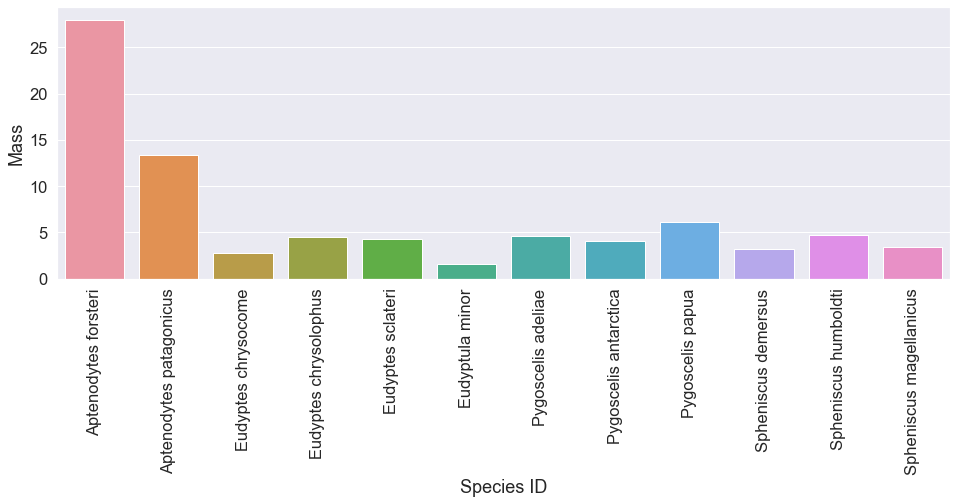

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plot_dims = (16, 5)
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(figsize=plot_dims)
sns.barplot(x = 'species', y = 'mass', data = penguins_df)
ax.set(xlabel = 'Species ID', ylabel = 'Mass')
plt.xticks(rotation=90)

#### *Q1* What is the smallest penguin species? 

#### Answer: Eudyptula minor

#### *Q2* What else is interesting about this species?

#### Answer: A Linux kernel programming challenge called the Eudyptula Challenge has attracted thousands of persons; its creator(s) use the name "Little Penguin"

### 9. Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis)

In [32]:
penguins_df

,species,mass,molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,42459.6021,48.381452
1,Aptenodytes patagonicus,13.40,42563.7067,49.693788
2,Eudyptes chrysocome,2.80,42475.5753,51.181102
3,Eudyptes chrysolophus,4.50,42445.5493,50.918635
4,Eudyptes sclateri,4.25,42475.5753,50.831146
5,Eudyptula minor,1.60,42491.6408,49.256343
6,Pygoscelis adeliae,4.60,42458.6140,49.081365
7,Pygoscelis antarctica,4.10,42404.5423,47.769029
8,Pygoscelis papua,6.10,42595.8759,47.156605
9,Spheniscus demersus,3.20,42431.5490,48.293963


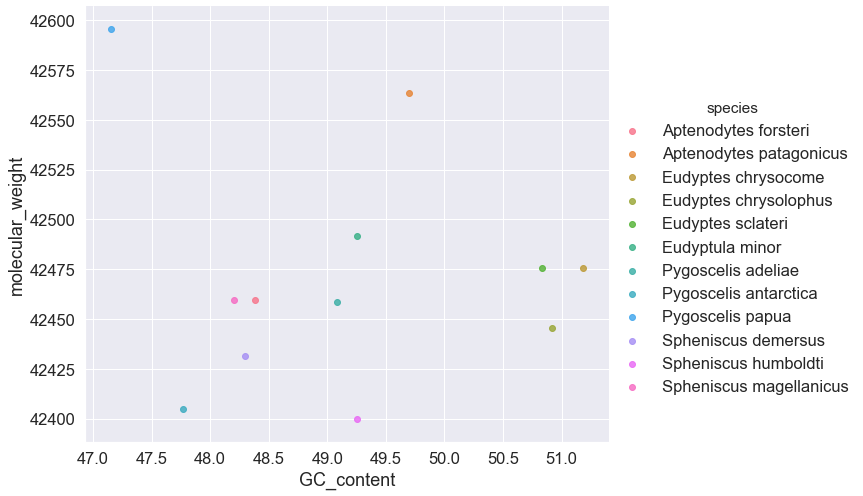

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.lmplot( 'GC_content','molecular_weight', data = penguins_df, fit_reg=False, height=7, aspect=1.3, hue="species")

### 10. Save the new DataFrame to a file called "penguins_mass_cytb.csv"

In [51]:
penguins_df.to_csv("penguins_mass_cytb.csv", index = False)

### 11. What else can we do with this dataset in Python?

[Text(0, 0.5, 'Species'), Text(0.5, 0, 'molecular_weight')]

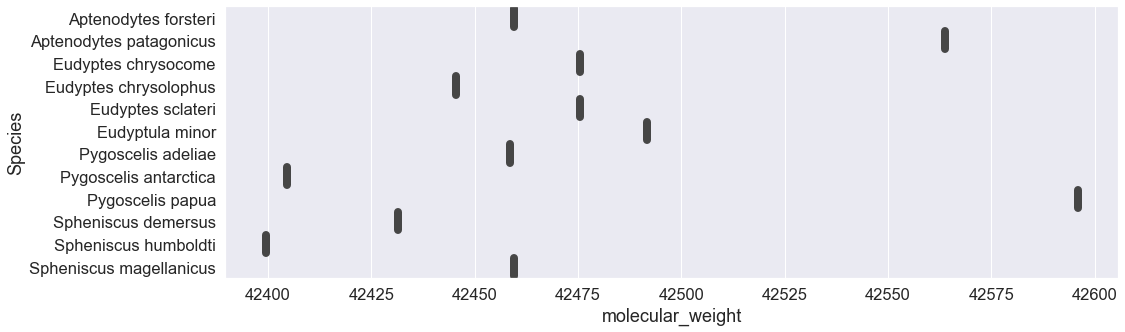

In [61]:
fig, ax = plt.subplots(figsize=plot_dims)
g = sns.violinplot('molecular_weight','species', data=penguins_df, linewidth=8, orient="h", cut=0)
ax.set(ylabel='Species', xlabel='molecular_weight')
